# 拉格朗日函数

原始问题是一个**凸二次规划问题**：

$$
\underset {x \in R^N}{\min} f(x) \tag{1} \label{1} \\
s.t. c_i(x) \leq 0, i=1, 2, \ldots, k \\
h_j(x) = 0, j=1, 2, \ldots l
$$

添加拉格朗日算子后写成：

$$
\mathcal L(x, \alpha, \beta) = f(x)+\sum_{i=1}^k\alpha_i c_i(x)+\sum_{j=1}^l\beta_j h_j(x) \tag{2} \label{2}
$$

将对$x$有限制条件的$f(x)$的最优化问题转换为对$x,\alpha,\beta$的没有限制条件的极值问题。其中$\alpha, \beta$是拉格朗日乘子，且$\alpha_i \geq 0$。

再定义函数

$$
\theta_p(x)=\underset{\alpha, \beta, \alpha_i \geq 0}{\max} \mathcal L(x, \alpha, \beta) \tag{3} \label{3}
$$

将$(\ref{2})$带入得到：

$$
\theta_p(x)=\underset{\alpha, \beta, \alpha_i \geq 0}{\max} \left(f(x)+\sum_{i=1}^k\alpha_i c_i(x)+\sum_{j=1}^l\beta_j h_j(x)\right) \tag{4}\label{4}
$$

分析可知：

1. 如果有$x$不满足约束条件，即$c_i(x) \gt 0$或者$h_j(x) \neq 0$时，由于$\alpha_i \geq 0$，可以取$\alpha_i = +\infty, \beta_jh_j(x)=+\infty$，则$\theta_p(x) \dashrightarrow +\infty$。

2. 如果满足全部原始约束条件，有$\sum_{j=1}^l\beta_j h_j(x)=0$， $\sum_{i=1}^k\alpha_i c_i(x) \leq 0$，所以$\theta_p(x) \leq f(x)$。要使$\theta_p(x)$最大，需要$\sum_{i=1}^k\alpha_i c_i(x) = 0$，此时$\theta_p(x)=f(x)$。这里$\theta_p(x)$把$x$看成常数，所以$f(x)$也是常数，所以$max(f(x))=f(x)$。

3. 所以原最小化问题$\underset {x \in R^N}{\min} f(x)$可以变为$\underset {x \in R^N}{\min} \theta_p(x)$即$\underset {x}{\min} \underset {\alpha, \beta,\alpha_i \geq 0}{max} \mathcal L(x, \alpha, \beta)$

转换为对偶问题，因为最小值的最大值小于等于最大值的最小值即$\max \min \leq \min \max$，所以：

$$
\underset {\alpha, \beta,\alpha_i \geq 0}{max} \underset {x}{\min} \mathcal L(x, \alpha, \beta) \leq \underset {x}{\min} \underset {\alpha, \beta,\alpha_i \geq 0}{max} \mathcal L(x, \alpha, \beta) \tag{5}\label{5}
$$

可以看出对偶问题的外层是先求得拉格朗日参数，然后通过拉格朗日参数求得最终超平面参数$x$，而原问题是直接求$x$，因为存在其他未知参数所以无法直接求出。

# SVM优化的问题

原问题

$$
\underset {\mathbf w, b}{min} \frac{1}{2}\Vert \mathbf w \Vert^2 \tag{6}\label{6} \\
subject to \\
y_i(\mathbf w \mathbf x_i + b) >= 1,\  \forall j \in \{1, 2, \ldots, N\}
$$

使用拉格朗日算子得到

$$
\mathcal L(\mathbf w, b, \alpha)=\frac{1}{2}\Vert \mathbf w \Vert^2 + \sum_{i=1}^N\alpha_i \left(1-y_i (\mathbf w^T \mathbf x_i + b)\right) \tag{7}\label{7}
$$

需要求解$\underset{\mathbf w, b}{\min} \underset{\alpha, \alpha_i\geq 0}{\max} \mathcal L(\mathbf w, b, \alpha)$
交换$\min, \max$得到对偶问题$\underset{\alpha, \alpha_i\geq 0}{\max} \underset{\mathbf w, b}{\min} \mathcal L(\mathbf w, b, \alpha)$

把$\mathbf w, b$看成关于$\alpha$的函数，求最小值，求导得到:

$$
\frac{\partial \mathcal L(\mathbf w, b, \alpha)}{\partial \mathbf w}=\mathbf w - \sum_{i=1}^N\alpha_iy_i\mathbf x_i = 0 \tag{8}\label{8}
$$

$$
\frac{\partial \mathcal L(\mathbf w, b, \alpha)}{b}=\sum_{i=1}^N\alpha_i = 0 \tag{9}\label{9}
$$

将$(\ref{8}) (\ref{9})$带入$\mathcal L(\mathbf w, b, \alpha)$ 得到：

$$
\begin{aligned}
\mathcal L(\mathbf w, b, \alpha) &= \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j\mathbf x_i^T \mathbf x_j + \sum_{i=1}^N\alpha_i-\sum_{i=1}^N\alpha_iy_i\left((\sum_{j=1}^N\alpha_jy_j\mathbf x_j)\cdot\mathbf x_i+b\right) \\
&= \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j\mathbf x_i^T \mathbf x_j +\sum_{i=1}^N\alpha_i-\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j\mathbf x_i^T \mathbf x_j-b\sum_{i=1}^N\alpha_iy_i \\
&=-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j\mathbf x_i^T \mathbf x_j +\sum_{i=1}^N\alpha_i + b*0 \\
&=-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j\mathbf x_i^T \mathbf x_j +\sum_{i=1}^N\alpha_i 
\end{aligned}
$$

此时再求$\underset{\alpha, \alpha_i\geq 0}{\max} \underset{\mathbf w, b}{\min} \mathcal L(\mathbf w, b, \alpha)$，即

$$
\begin{aligned}
& \underset{\alpha, \alpha_i\geq 0}{\max} \underset{\mathbf w, b}{\min} \mathcal L(\mathbf w, b, \alpha) = \underset {\alpha}{\max} \left\{ -\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j\mathbf x_i^T \mathbf x_j +\sum_{i=1}^N\alpha_i \right \} \\
& s.t. \sum_{i=1}^N\alpha_iy_i=0 \\
& \alpha_j \geq 0, \forall j \in \{1, 2, \ldots, N\}
\end{aligned}
$$

解出$\alpha$之后，求出$\mathbf w, b$，得到：

$$
\begin{aligned}
f(\mathbf x_{test})&=\mathbf w^T\mathbf x+b \\
&=\sum_{i=1}^N\alpha_iy_i\mathbf x_i^T\mathbf x_{test}+b
\end{aligned}
$$

KKT条件为：

$$
\begin{cases}
\alpha_i \geq 0 \\
1-y_i f(\mathbf x_i) \leq 0 \\
\alpha_i(1-y_i f(\mathbf x_i)) = 0
\end{cases}
$$

所以对任意样本，总有$\alpha_i=0$或者$1-y_i f(\mathbf x_i)=0$。

- 若$\alpha_i=0$，则该样本不会在$\sum_{i=1}^N\alpha_iy_i\mathbf x_i^T\mathbf x_{test}+b$中出现，就不会对$f(\mathbf x)$有任何影响。
- 若$\alpha_i \gt 0$，则必有$y_i f(\mathbf x_i)=1$，对应的点在最大间隔的边界上，是一个支持向量。所以训练完成后，大部分样本都不需要保留，最终模型只与支持向量有关。


[1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 2 1 2 2 1 2 2 2
 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2 1 2 2 1 2 2]
(67, 2)


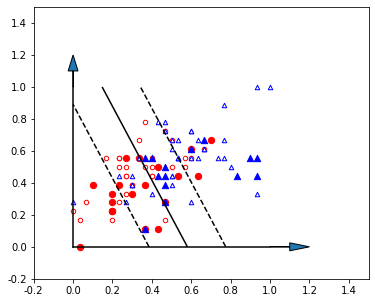

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

%matplotlib inline

plt.figure(figsize=(6, 5))
plt.xlim(-0.2, 1.5)
plt.ylim(-0.2, 1.5)
plt.plot([0, 0], [0, 1], c='k')
plt.plot([0, 1], [0, 0], c='k')
plt.arrow(1.0, 0, 0.2, 0.0, head_width=0.05, head_length=0.1, **{'length_includes_head': True})
plt.arrow(0.0, 1.0, 0, 0.2, head_width=0.05, head_length=0.1, **{'length_includes_head': True})


iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

scaler = MinMaxScaler()
X = scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = svm.SVC(kernel='linear', gamma=10)
clf.fit(X_train, y_train)
print(y_train)
print(X_train.shape)
for v, c, m in zip([1, 2], ['r','b'], ['o', '^']):
    ix = np.where(y_train==v)[0]
    xc = np.take(X_train, ix, axis=0)
    yc = np.take(y_train, ix, axis=0)
    plt.scatter(xc[:, 0], xc[:, 1], s=20, marker=m, fc='w', ec=c)
    
    ix = np.where(y_test==v)[0]
    xc = np.take(X_test, ix, axis=0)
    yc = np.take(y_test, ix, axis=0)
    plt.scatter(xc[:, 0], xc[:, 1], s=40, marker=m, c=c)

    
# plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
#             edgecolor='k', s=40)

# Circle out the test data
# plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
#             zorder=10, edgecolor='k')

# plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

# 软间隔

如果数据不可分，可以引入软间隔(soft margin)，即允许支持向量机一定程度上出错。

引入常量$C$和0-1损失函数$l_{0/1(z)}$:

$$
\begin{aligned}
l_{0/1}(z)&=
\begin{cases}
1, z \leq 0 \\
0, z \geq 0
\end{cases}
&=max\left(0, 1-yf(\mathbf x; \mathbf w, b)\right)
\end{aligned}
$$

允许部分样本分类出错，即：

$$
y_i(\mathbf w^T \mathbf x+b)\lt1
$$

目标是最大化间隔的同时，尽量减少不满足约束条件的样本的条件，此时优化目标为：

$$
\mathcal L(\mathbf w, b)= \underset{\mathbf w, b}{\min} \frac{1}{2}\Vert \mathbf w\Vert^2+C\sum_{i=1}^ml_{0/1}(1-y_i(\mathbf w^T\mathbf x_i + b))
$$

$C$无穷大时，迫使后面部分$l_{0/1}(1-y_i(\mathbf w^T\mathbf x_i + b))=0$，即$1-y_i(\mathbf w^T\mathbf x_i + b)<=0$，所有的样本点都满足约束条件。$C$的取值有限时，允许一部分样本点不满足约束条件。

0-1损失函数非凸、非连续，数学性质不好，可以使用其他函数来代替：

- hinge损失：$\mathcal L_{hinge}=\max(0, 1-z)$
- 指数损失: $\mathcal L_{exp}=e^{-z}$
- 对数损失: $\mathcal L_{log}=log(1+e^{-z})$

对应的图像如下

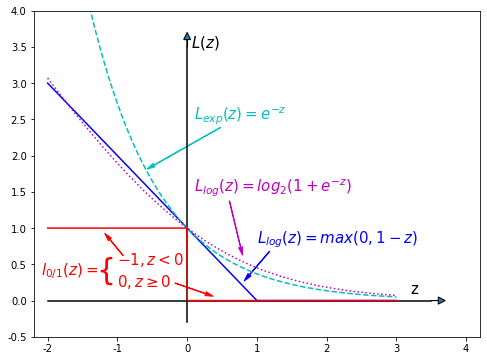

In [237]:
import matplotlib.patches as patches

fontdict = {'size':15}

plt.figure(figsize=(8, 6))
# plt.axis('off')
plt.xlim(-2.2, 4.2)
plt.ylim(-0.5, 4)
plt.plot([-2, 3.5], [0, 0], c='k', zorder=1)
plt.plot([0, 0], [-0.3, 3.5], c='k', zorder=1)
plt.arrow(3.5, 0, 0.2, 0.0, head_width=0.1, head_length=0.1, **{'length_includes_head': True}, zorder=1)
plt.arrow(0.0, 3.5, 0, 0.2, head_width=0.1, head_length=0.1, **{'length_includes_head': True}, zorder=1)
plt.text(3.2, 0.1, 'z', c='k',**fontdict)
plt.text(0.05, 3.5, r'$L(z)$', c='k', **fontdict)

z = np.linspace(-2,3,1000)
l_hinge = 1-z
l_hinge = np.where(l_hinge<0, 0, l_hinge)

l_01 = np.where(z<0, 1, 0)

l_exp = np.exp(-z)
l_log = np.log2(1+np.exp(-z))
plt.plot(z, l_hinge, zorder=2, c='b')
plt.plot(z, l_exp, zorder=2, linestyle='--', c='c')
plt.plot(z, l_log, zorder=2, linestyle=':', c='m')
plt.plot(z, l_01, zorder=2, c='r')

style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style)

plt.text(0.1, 2.5, r'$L_{exp}(z)=e^{-z}$', c='c',**fontdict)
a1 = patches.FancyArrowPatch((0.5,2.4), (-0.6,1.8),**kw, color='c')
plt.text(0.1, 1.5, r'$L_{log}(z)=log_2(1+e^{-z})$', c='m',**fontdict)
a2 = patches.FancyArrowPatch((0.6,1.4), (0.8,0.6),**kw, color='m')
plt.text(1.0, 0.8, r'$L_{log}(z)=max(0, 1-z)$', c='b',**fontdict)
a3 = patches.FancyArrowPatch((1.2,0.7), (0.8,0.25),**kw, color='b')

plt.text(-2.1, 0.35, r'$l_{0/1}(z)=$', **fontdict, color='r')
plt.text(-1.0, 0.5, r'$-1, z<0$',**fontdict, color='r')
plt.text(-1.0, 0.2, r'$0, z\geq0$',**fontdict, color='r')
plt.text(-1.3, 0.30, r"$\{$",fontsize=30, color='r')
a4 = patches.FancyArrowPatch((-0.9,0.6), (-1.2,0.95),**kw, color='r')
a5 = patches.FancyArrowPatch((-0.2,0.25), (0.4,0.05),**kw, color='r')

# a3 = patches.FancyArrowPatch((-0.4,-0.6), (0.4,-0.6),connectionstyle="arc3,rad=.5", **kw)

for a in [a1,a2,a3, a4, a5]:
    plt.gca().add_patch(a)

如果采用hinge损失，优化目标函数变为：

$$
\mathcal L(\mathbf w, b)= \underset{\mathbf w, b}{\min} \frac{1}{2}\Vert \mathbf w\Vert^2+C\sum_{i=1}^m\max(0,1-y_i(\mathbf w^T\mathbf x_i + b))
$$

引入松弛变量，将上式写成：

$$
\mathcal L(\mathbf w, b)= \underset{\mathbf w, b}{\min} \frac{1}{2}\Vert \mathbf w\Vert^2+C\sum_{i=1}^m\xi_i \\
s.t.\ 1-y_i(\mathbf w^T\mathbf x_i + b)-\xi_i \leq 0 \\
\xi_i \geq 0, i=1,2,\ldots, m
$$

原来的硬间隔要求$1-y_i(\mathbf w^T\mathbf x_i + b) \leq 0$，所有的样本离超平面的距离都要大于$\frac{1}{\Vert \mathbf w\Vert}$。而引入松弛变量$\xi$之后，允许那些距离超平面$\frac{1-\xi}{\Vert \mathbf w\Vert}$的点存在，这样可以不因为这些离群点改变原有的可以将大多数样本正确划分的超平面。可以看出$\xi=0$即硬间隔，不允许离群点存在；$\xi$越大，离群点偏离分类越远；$\xi=1$是，离群点在超平面上，$xi\gt1$时，离群点已经跑到另外一个分类中去了，即被错误分类了。

而$C$是和$\xi$一起引入的，代表了有多重视离群点。$C$越大表示越重视离群点，$C$为无穷大时，迫使$\sum_{i=1}^m\xi_i=0$，而$\xi_i\gt0$，所以$\xi_i=0$，即不允许离群点存在。

上面的软间隔优化目标也是二次规划，同样转换为拉格朗日函数：

$$
\underset{\mathbf w, b, \xi}{\min} \underset{\alpha, \mu}{\max} \mathcal L(\mathbf w, b, \alpha)=\frac{1}{2}\Vert \mathbf w \Vert^2 + C\sum_{i=1}^m\xi_i++ \sum_{i=1}^N\alpha_i \left(1-\xi_i-y_i (\mathbf w^T \mathbf x_i + b)\right)-\sum_{i=1}^m\mu_ixi_i
$$

其中$\alpha_i \geq 0, \mu_i\geq 0$是拉格朗日因子，转换为对偶问题:

$$
\underset{\mathbf w, b, \xi}{\min} \underset{\alpha, \mu}{\max} \mathcal L(\mathbf w, b, \alpha) \geq \underset{\alpha, \mu}{\max} \underset{\mathbf w, b, \xi}{\min}  \mathcal L(\mathbf w, b, \alpha)
$$

令$L(\mathbf w, b, \alpha)$对$\mathbf w, b, \xi$求偏导并等于0得到：

$$
\mathbf w = \sum_{i=1}^m\alpha_iy_i\mathbf x_i
$$

$$
0 = \sum_{i=1}^m\alpha_iy_i
$$

$$
C=\alpha_i+\mu_i
$$

带入$\mathcal L(\mathbf w, b, \alpha)$得到最小值，然后起对偶问题转化为：

$$
\underset{\alpha}{\max} \sum_{i=1}^m\alpha_i-\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_j\mathbf x_i^T \mathbf x_i \\
s.t.\ sum_{i=1}^m\alpha_iy_i=0\\
0 \leq \alpha_i \leq C, i=1, 2, \ldots, m
$$

对比硬间隔， 软间隔的差别仅在于对对偶变量的约束不同：前者是$\alpha_i \geq 0$，后者是$0 \leq \alpha_i \leq C$。

# 核函数

只要矩阵半正定的，就可以作为核函数，常用的有:

- 线性核, $K(\mathbf x_i, \mathbf x_j)=\mathbf x_i^T \mathbf x_j$
- 多项式核，$K(\mathbf x_i, \mathbf x_j)=(\mathbf x_i^T \mathbf x_j)^d$；$d \geq 1$是多项式系数
- 高斯核，$K(\mathbf x_i, \mathbf x_j)=exp\left(-\frac{\Vert\mathbf x_i-\mathbf x_j\Vert^2}{2\sigma^2}\right)$；$\sigma \gt 0$是高斯核的带宽
- 拉普拉斯核，$K(\mathbf x_i, \mathbf x_j)=exp\left(-\frac{\Vert\mathbf x_i-\mathbf x_j\Vert}{\sigma}\right)$；$\sigma \gt 0$
- sigmoid核，$K(\mathbf x_i, \mathbf x_j)=\tanh(\beta\mathbf x_i^T \mathbf x_j+\theta)$；$\tanh$为双曲正切函数，$\beta \gt 0, \theta \gt 0$